<a href="https://colab.research.google.com/github/Abishethvarman/FakeNewsDetection/blob/CNN-RNN/2.1-FakeNewsDetector_RNN_LSTM_DS1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
## Import Dependencies
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import nltk
import re
import gensim

from nltk import download
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
nltk.download("stopwords")
download('punkt')

from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS

In [40]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

In [2]:
# import keras
from tensorflow.keras.preprocessing.text import one_hot, Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Embedding, Input, LSTM, Conv1D, MaxPool1D, Bidirectional
from tensorflow.keras.models import Model
# from jupyterthemes import jtplot
# jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

!ln -s /content/gdrive/My\ Drive/ /mydrive
!ls /mydrive

In [4]:
%cd /mydrive/dataset/

/content/gdrive/My Drive/dataset


In [5]:
df_reliable = pd.read_csv("Reliable.csv")
df_fake = pd.read_csv("Fake.csv")

In [6]:
df_reliable['isfake'] = 1

In [7]:
df_fake['isfake'] = 0

In [8]:
df = pd.concat([df_reliable, df_fake]).reset_index(drop = True)

In [9]:
df.drop(columns = ['date'], inplace = True)

In [10]:
df['original'] = df['title'] + ' ' + df['text']
df.head(3)

,title,text,subject,isfake,original
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,1,"As U.S. budget fight looms, Republicans flip t..."
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,1,U.S. military to accept transgender recruits o...
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,1,Senior U.S. Republican senator: 'Let Mr. Muell...


In [11]:
df['original'][0]

'As U.S. budget fight looms, Republicans flip their fiscal script WASHINGTON (Reuters) - The head of a conservative Republican faction in the U.S. Congress, who voted this month for a huge expansion of the national debt to pay for tax cuts, called himself a “fiscal conservative” on Sunday and urged budget restraint in 2018. In keeping with a sharp pivot under way among Republicans, U.S. Representative Mark Meadows, speaking on CBS’ “Face the Nation,” drew a hard line on federal spending, which lawmakers are bracing to do battle over in January. When they return from the holidays on Wednesday, lawmakers will begin trying to pass a federal budget in a fight likely to be linked to other issues, such as immigration policy, even as the November congressional election campaigns approach in which Republicans will seek to keep control of Congress. President Donald Trump and his Republicans want a big budget increase in military spending, while Democrats also want proportional increases for non

In [12]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

In [13]:
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3 and token not in stop_words:
            result.append(token)

    return result


In [14]:
# Apply the function to the dataframe
df['clean'] = df['original'].apply(preprocess)

In [15]:
print(df['clean'][0])

['budget', 'fight', 'looms', 'republicans', 'flip', 'fiscal', 'script', 'washington', 'reuters', 'head', 'conservative', 'republican', 'faction', 'congress', 'voted', 'month', 'huge', 'expansion', 'national', 'debt', 'cuts', 'called', 'fiscal', 'conservative', 'sunday', 'urged', 'budget', 'restraint', 'keeping', 'sharp', 'pivot', 'republicans', 'representative', 'mark', 'meadows', 'speaking', 'face', 'nation', 'drew', 'hard', 'line', 'federal', 'spending', 'lawmakers', 'bracing', 'battle', 'january', 'return', 'holidays', 'wednesday', 'lawmakers', 'begin', 'trying', 'pass', 'federal', 'budget', 'fight', 'likely', 'linked', 'issues', 'immigration', 'policy', 'november', 'congressional', 'election', 'campaigns', 'approach', 'republicans', 'seek', 'control', 'congress', 'president', 'donald', 'trump', 'republicans', 'want', 'budget', 'increase', 'military', 'spending', 'democrats', 'want', 'proportional', 'increases', 'defense', 'discretionary', 'spending', 'programs', 'support', 'educati

In [16]:
list_of_words = []
for i in df.clean:
    for j in i:
        list_of_words.append(j)

In [17]:
len(list_of_words)
total_words = len(list(set(list_of_words)))
total_words

108704

In [18]:
df['clean_joined'] = df['clean'].apply(lambda x: " ".join(x))
df.head(2)

,title,text,subject,isfake,original,clean,clean_joined
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,1,"As U.S. budget fight looms, Republicans flip t...","[budget, fight, looms, republicans, flip, fisc...",budget fight looms republicans flip fiscal scr...
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,1,U.S. military to accept transgender recruits o...,"[military, accept, transgender, recruits, mond...",military accept transgender recruits monday pe...


In [19]:
df['clean_joined'][0]

'budget fight looms republicans flip fiscal script washington reuters head conservative republican faction congress voted month huge expansion national debt cuts called fiscal conservative sunday urged budget restraint keeping sharp pivot republicans representative mark meadows speaking face nation drew hard line federal spending lawmakers bracing battle january return holidays wednesday lawmakers begin trying pass federal budget fight likely linked issues immigration policy november congressional election campaigns approach republicans seek control congress president donald trump republicans want budget increase military spending democrats want proportional increases defense discretionary spending programs support education scientific research infrastructure public health environmental protection trump administration willing going increase defense discretionary spending percent meadows chairman small influential house freedom caucus said program democrats saying need government raise 

<Axes: xlabel='count', ylabel='subject'>

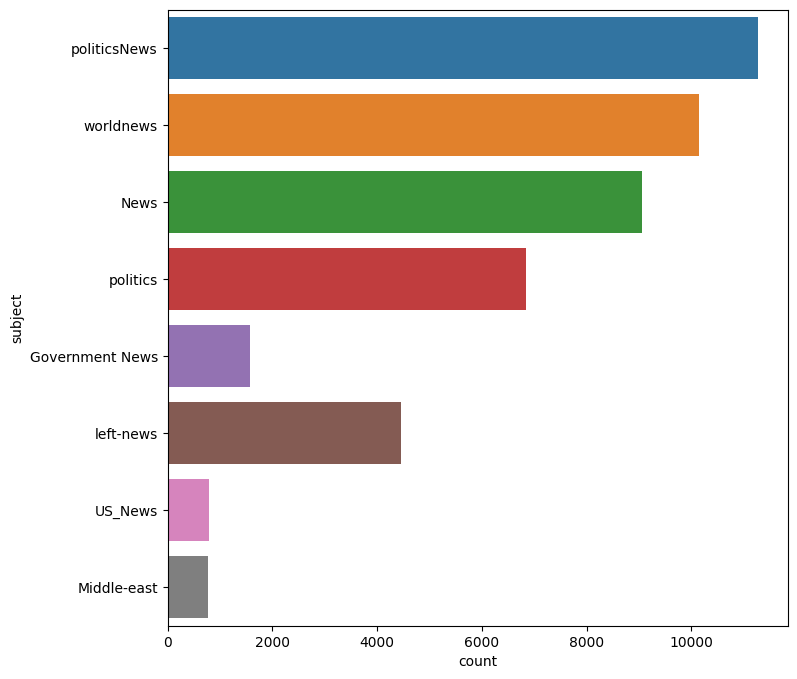

In [20]:
# plot the number of samples in 'subject'
plt.figure(figsize = (8, 8))
sns.countplot(y = "subject", data = df)

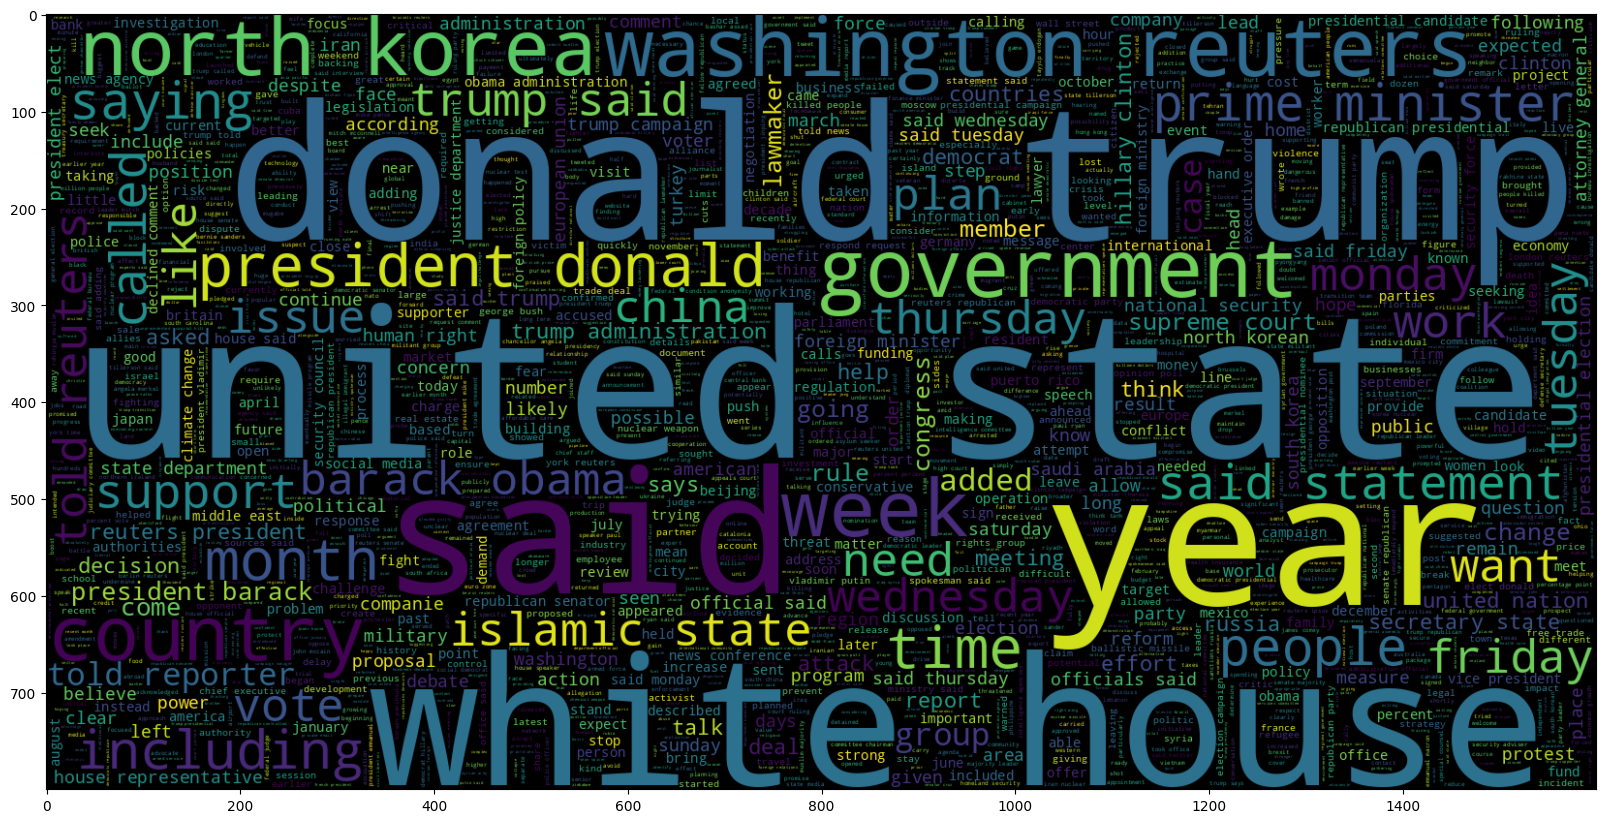

In [21]:
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800 , stopwords = stop_words).generate(" ".join(df[df.isfake == 1].clean_joined))
plt.imshow(wc, interpolation = 'bilinear')

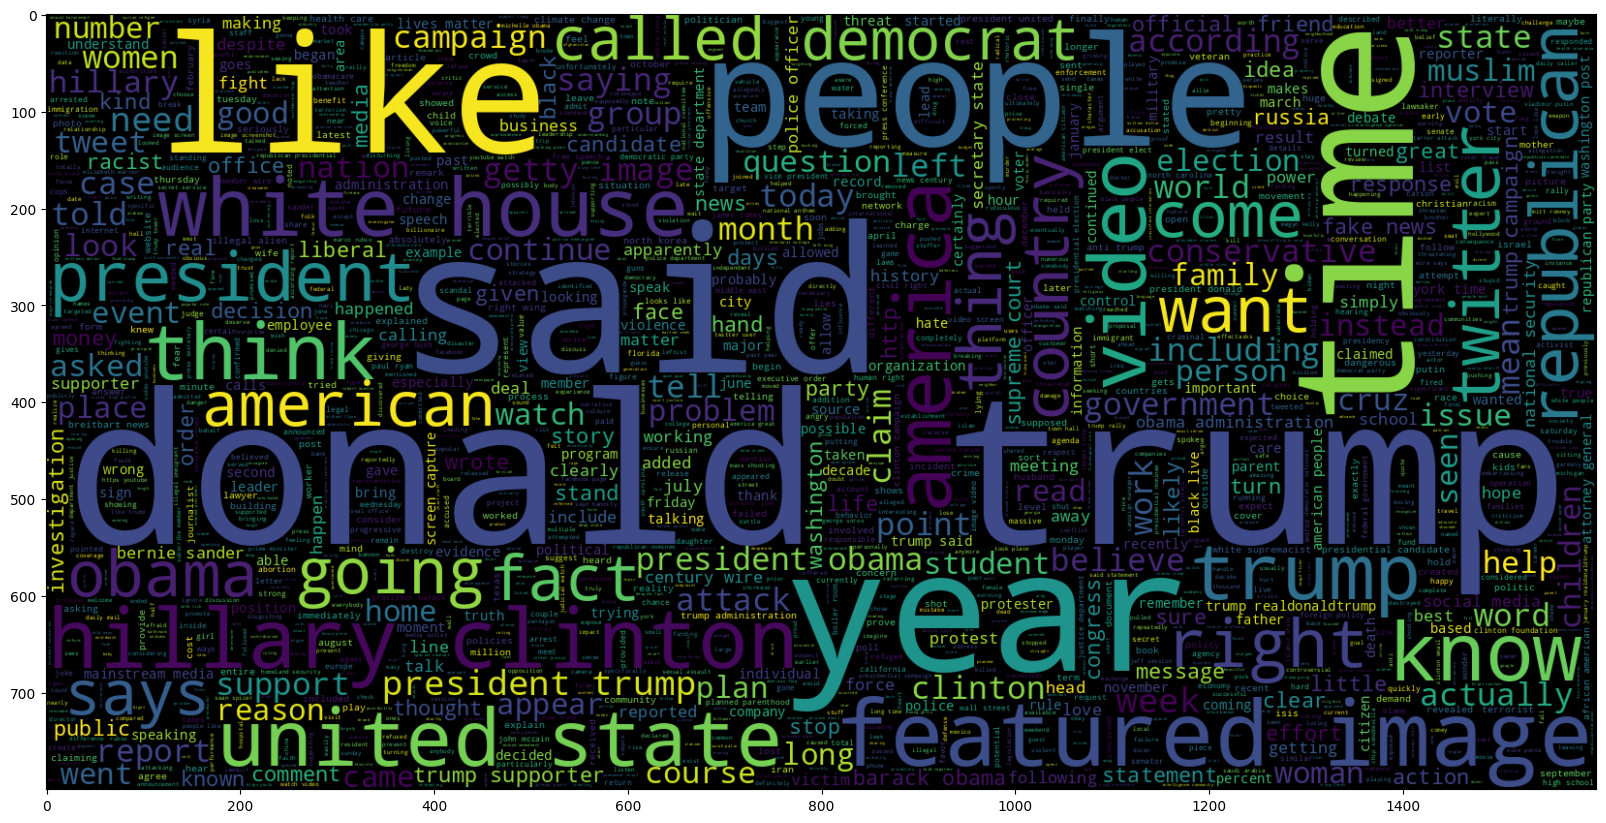

In [22]:
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800 , stopwords = stop_words).generate(" ".join(df[df.isfake == 0].clean_joined))
plt.imshow(wc, interpolation = 'bilinear')

In [23]:
maxlen = -1
for doc in df.clean_joined:
    tokens = nltk.word_tokenize(doc)
    if(maxlen<len(tokens)):
        maxlen = len(tokens)
print("The maximum number of words in any document is =", maxlen)

The maximum number of words in any document is = 4405


In [24]:
import plotly.express as px
fig = px.histogram(x = [len(nltk.word_tokenize(x)) for x in df.clean_joined], nbins = 100)
fig.show()

In [25]:
# split data into test and train
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df.clean_joined, df.isfake, test_size = 0.2)
from nltk import word_tokenize

In [26]:
# Create a tokenizer to tokenize the words and create sequences of tokenized words
tokenizer = Tokenizer(num_words = total_words)
tokenizer.fit_on_texts(x_train)
train_sequences = tokenizer.texts_to_sequences(x_train)
test_sequences = tokenizer.texts_to_sequences(x_test)
print("The encoding for document\n",df.clean_joined[0],"\n is : ",train_sequences[0])

The encoding for document
 budget fight looms republicans flip fiscal script washington reuters head conservative republican faction congress voted month huge expansion national debt cuts called fiscal conservative sunday urged budget restraint keeping sharp pivot republicans representative mark meadows speaking face nation drew hard line federal spending lawmakers bracing battle january return holidays wednesday lawmakers begin trying pass federal budget fight likely linked issues immigration policy november congressional election campaigns approach republicans seek control congress president donald trump republicans want budget increase military spending democrats want proportional increases defense discretionary spending programs support education scientific research infrastructure public health environmental protection trump administration willing going increase defense discretionary spending percent meadows chairman small influential house freedom caucus said program democrats say

In [27]:
# Add padding can either be maxlen = 4406 or smaller number maxlen = 40 seems to work well based on results
padded_train = pad_sequences(train_sequences,maxlen = 40, padding = 'post', truncating = 'post')
padded_test = pad_sequences(test_sequences,maxlen = 40, truncating = 'post')
for i,doc in enumerate(padded_train[:2]):
     print("The padded encoding for document",i+1," is : ",doc)

The padded encoding for document 1  is :  [21256  2628  4630     7   408    25     9    63  1418  4310  2628  4630
  2253  2216   408   657    24     7   290  1264   248  1232   183     2
   171  1789   187   315   143   527   306   853   193   654    20  2628
   384    63  1195   121]
The padded encoding for document 2  is :  [  22 1248  387    1   41  463 4641 6333  471  171   22 2190  830 5655
  215  503  783  562 2308  853 5058   10    1  126   59    1 1020 7577
  471  557 3916 5853 3172 1433 1023   22 2999 1642 2006 3685]


In [28]:
# Sequential Model
model = Sequential()

# embeddidng layer
model.add(Embedding(total_words, output_dim = 128))

# Bi-Directional RNN and LSTM
model.add(Bidirectional(LSTM(128)))

# Dense layers
model.add(Dense(128, activation = 'relu'))
model.add(Dense(1,activation= 'sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 128)         13914112  
                                                                 
 bidirectional (Bidirection  (None, 256)               263168    
 al)                                                             
                                                                 
 dense (Dense)               (None, 128)               32896     
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 14210305 (54.21 MB)
Trainable params: 14210305 (54.21 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [29]:
total_words

108704

In [34]:
y_train = np.asarray(y_train)
# train the model
model.fit(padded_train, y_train, batch_size = 64, validation_split = 0.2, epochs = 20)

Epoch 1/20
449/449 [==============================] - 137s 304ms/step - loss: 3.7460e-08 - acc: 1.0000 - val_loss: 0.0093 - val_acc: 0.9989
Epoch 2/20
449/449 [==============================] - 127s 282ms/step - loss: 3.0116e-08 - acc: 1.0000 - val_loss: 0.0096 - val_acc: 0.9989
Epoch 3/20
449/449 [==============================] - 134s 298ms/step - loss: 2.3465e-08 - acc: 1.0000 - val_loss: 0.0099 - val_acc: 0.9987
Epoch 4/20
449/449 [==============================] - 126s 280ms/step - loss: 1.8531e-08 - acc: 1.0000 - val_loss: 0.0102 - val_acc: 0.9987
Epoch 5/20
449/449 [==============================] - 125s 279ms/step - loss: 1.4717e-08 - acc: 1.0000 - val_loss: 0.0105 - val_acc: 0.9987
Epoch 6/20
449/449 [==============================] - 125s 278ms/step - loss: 1.1764e-08 - acc: 1.0000 - val_loss: 0.0107 - val_acc: 0.9987
Epoch 7/20
449/449 [==============================] - 125s 278ms/step - loss: 9.4019e-09 - acc: 1.0000 - val_loss: 0.0110 - val_acc: 0.9987
Epoch 8/20
449/449 [

In [35]:
# make detection
detect = model.predict(padded_test)
# if the predicted value is >0.5 it is real else it is fake
detection = []
for i in range(len(detect)):
    if detect[i].item() > 0.5:
        detection.append(1)
    else:
        detection.append(0)
# getting the accuracy
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(list(y_test), detection)

print("Model Accuracy : ", accuracy)

281/281 [==============================] - 8s 27ms/step
Model Accuracy :  0.9985523385300669


In [37]:
# category dict
category = { 0: 'Fake News', 1 : "Reliable News"}


-------------------------------------

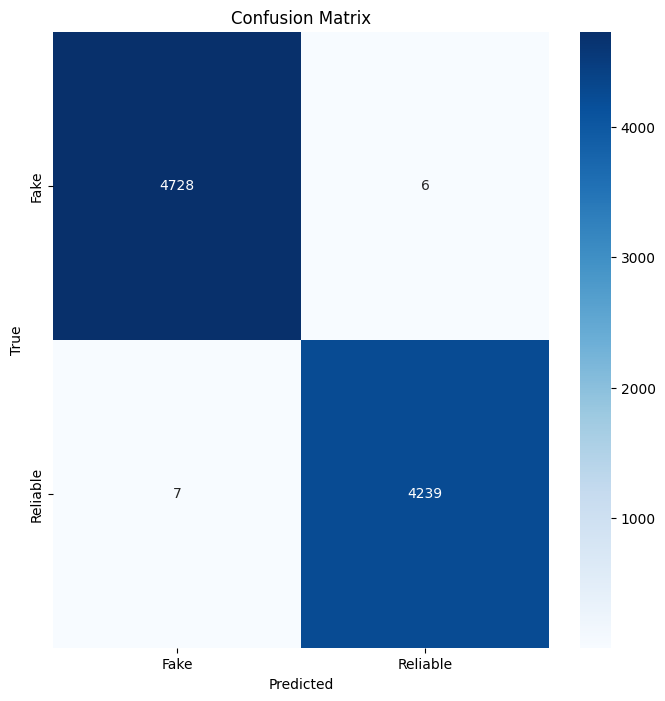

In [38]:
plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Fake', 'Reliable'], yticklabels=['Fake', 'Reliable'])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

In [42]:
precision = precision_score(list(y_test), detection)
recall = recall_score(list(y_test), detection)
f1 = f1_score(list(y_test), detection)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

print("\nClassification Report:")
print(classification_report(list(y_test), detection, target_names=['Fake', 'Reliable']))

Precision: 0.9985865724381625
Recall: 0.9983513895430994
F1 Score: 0.9984689671416794

Classification Report:
              precision    recall  f1-score   support

        Fake       1.00      1.00      1.00      4734
    Reliable       1.00      1.00      1.00      4246

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980

